In [1]:
# necessary anomaly imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from anomaly_intervalsStream import *
from anomaly8 import CollectiveAnomaly, PointAnomaly, SequentialAnomaly

In [2]:
# necessary anomaly imports
from stream import Stream
import arff

# replace filepath with local filepath for data
ECG1 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_1.arff')
ECG2 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_13.arff')
ECG3 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_15.arff')
#ECG1.to_arff(start=3500, end=6500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


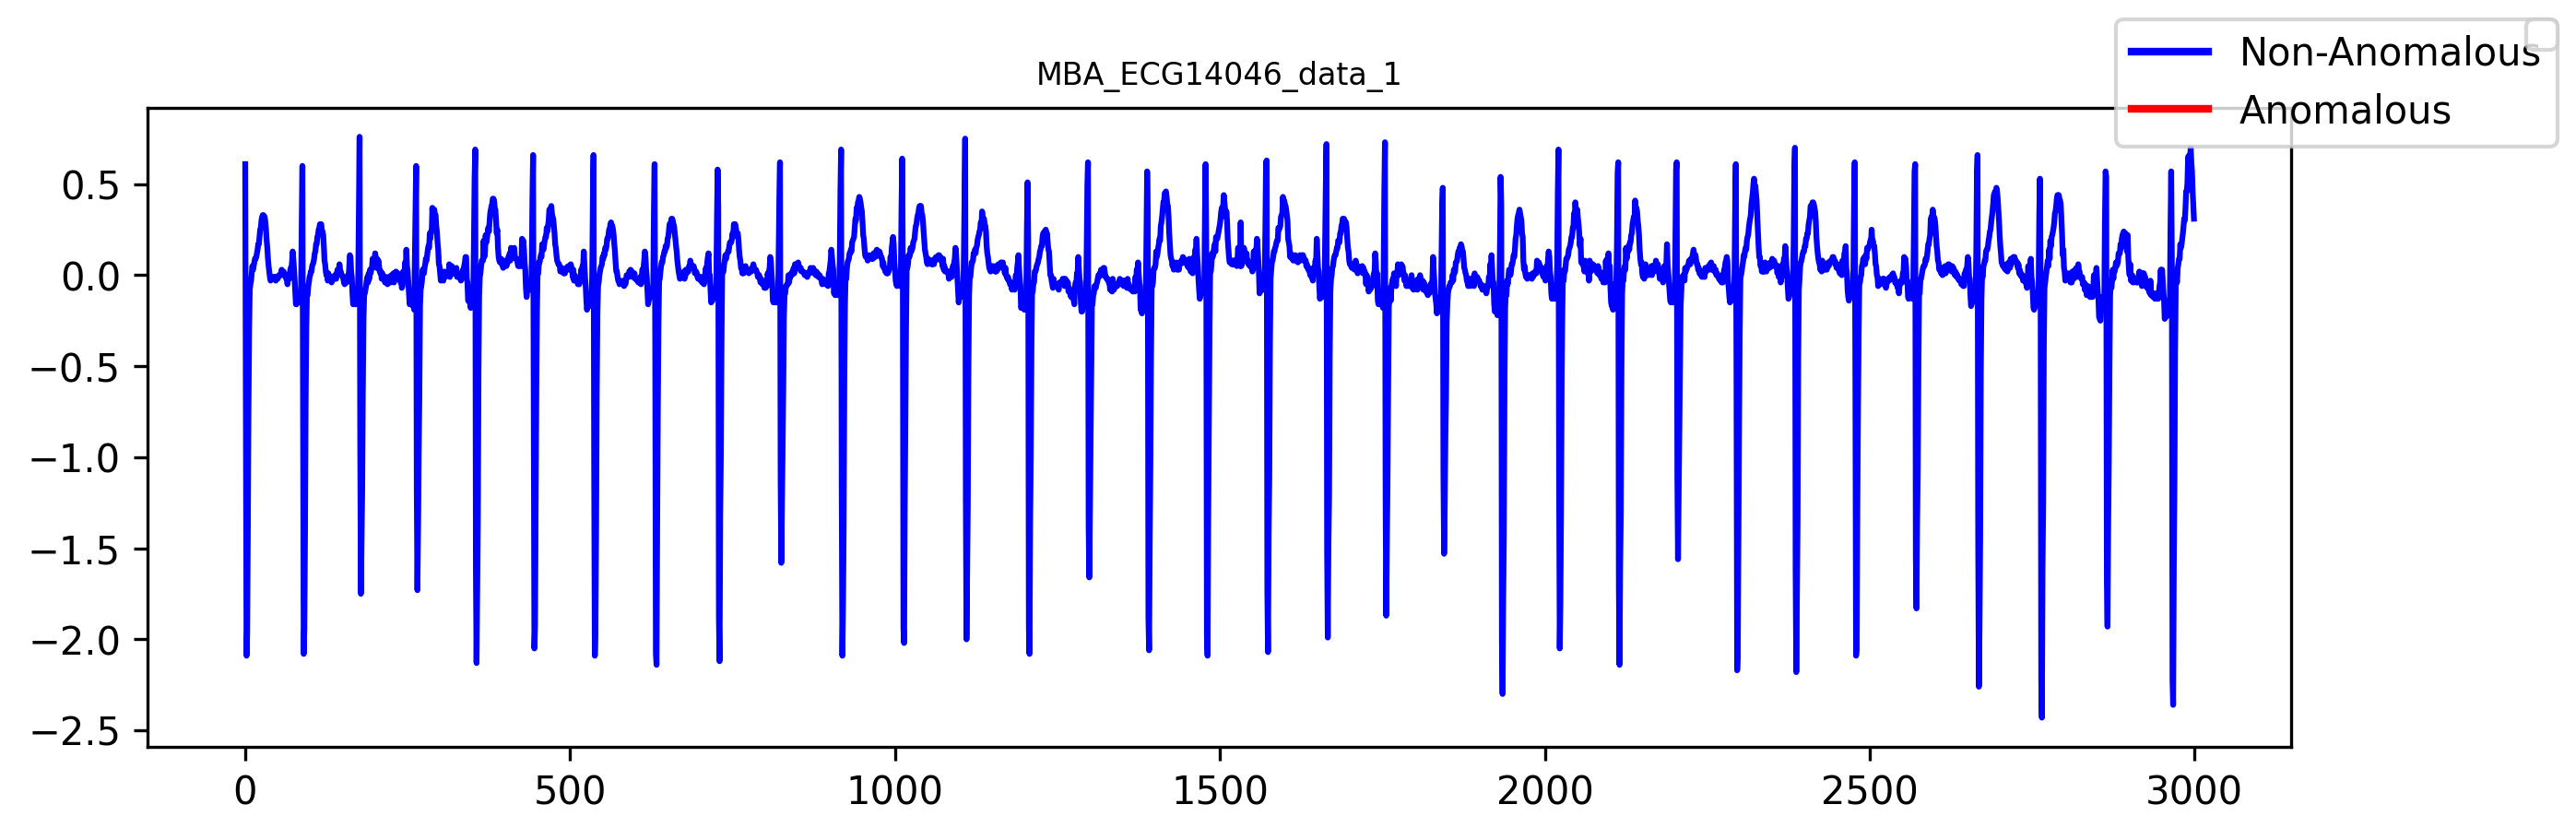

In [3]:
ECGtest = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/util/MBA_ECG14046_data_1.arff')
ECGtest.plot()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


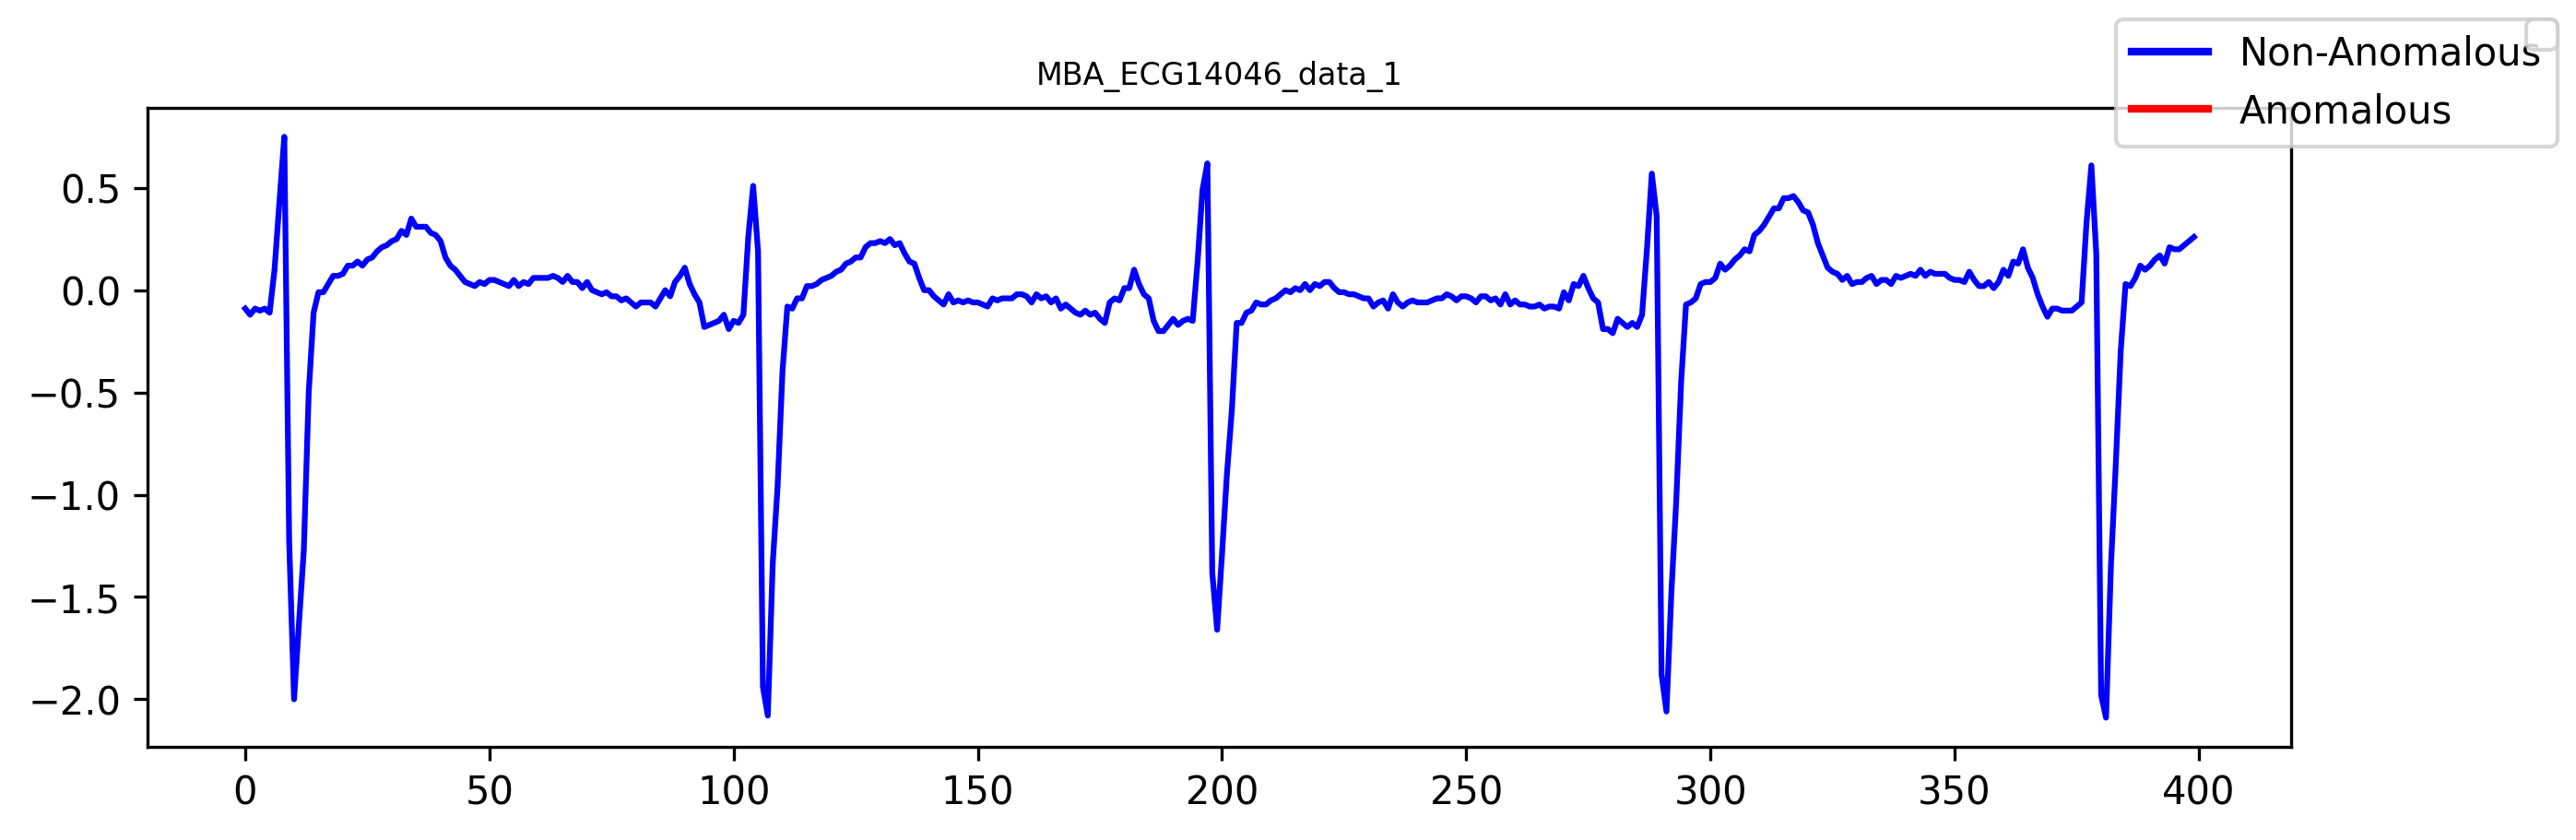

In [4]:
ECGtest.plot(start=1100, end=1500)

In [5]:
ECGtestanomalies = createAnomalyIntervals(ECGtest)




In [6]:
# creating point anomaly module with uniform distribution of values
pDistAnom1 = PointAnomaly(0.20, distribution='uniform', num_values=100, lowerbound=-1, upperbound=1) 
# creating point anomaly module with gaussian distribution of values
pDistAnom2 = PointAnomaly(0.05, distribution='gaussian', mu=0.7, std=0.9, num_values=20)
# creating point anomaly module with skew distribution of values
pDistAnom3 = PointAnomaly(0.002, distribution='skew', upperbound=2, skew=0.1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[   0. 1000. 2000. 3000.]
[(50.0, 950.0), (1050.0, 1950.0), (2050.0, 2950.0)]
Insertion Indexes:[450. 532. 181. 317. 386. 807. 364. 381. 578. 747. 804. 387. 180.  64.
 482. 170. 893. 791. 729. 790.  63. 637. 602. 181. 643. 647.  74. 386.
 885. 342. 345. 228. 103.  69. 251. 488. 938. 133. 903. 920. 692. 748.
 533. 440. 420. 129. 693. 512. 694. 491. 202. 880. 247. 153. 477. 288.
 281. 686. 608. 429.  89. 430.  61. 154. 598. 356. 714. 464. 115. 802.
 877. 700. 645. 762. 927. 749. 513. 537. 924. 266. 713. 682. 778. 611.
 773.  76. 596. 365. 208. 376. 462. 161. 557. 466. 226. 209. 505. 382.
 868. 253. 103. 918. 385. 622. 925. 460. 769. 617. 908. 594. 569.  63.
 859. 934. 402. 403. 345. 503. 921. 848. 366.  60. 428. 394. 344. 400.
 183. 355. 821. 222. 881. 303. 190. 282. 365. 438.  82. 507. 168. 795.
 299. 192. 438. 553. 488. 628. 133. 888. 924. 504. 581.  98. 340. 759.
 655. 691. 241. 492. 714. 646. 226. 230. 567. 445. 377. 343. 437. 177.
 284. 562. 148. 933. 767. 946. 373. 904. 219. 286. 2

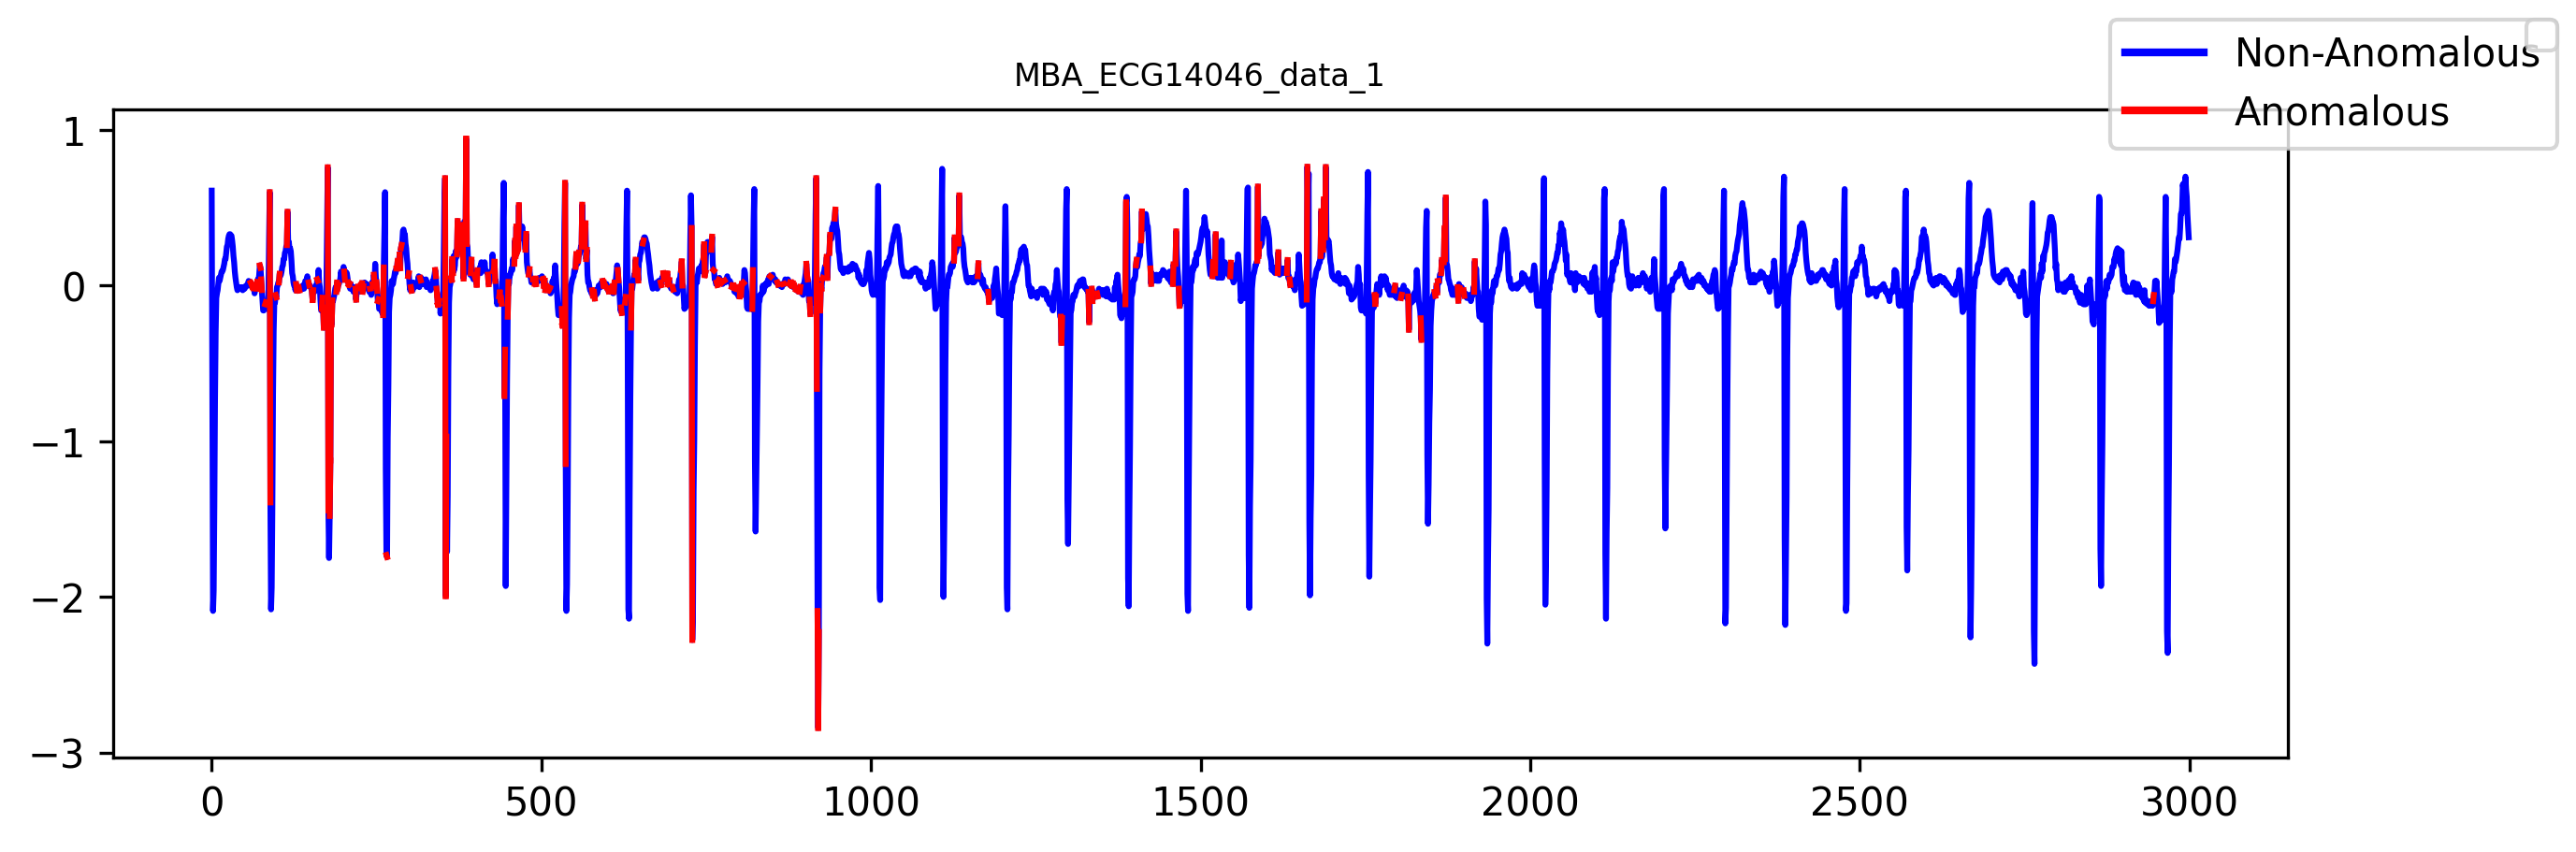

In [7]:
#IMPORTANT NOTE: gap size cannot exceed 1/2 interval size (no anomalies will be injected as interval size will be nonexistent)
ECGtestanomalies.create_intervals(3,100)
# add drift modules here corresponding to intervals
ECGtestanomalies.add_anomalies(pDistAnom1, pDistAnom2, pDistAnom3)
ECGtest.plot()

In [8]:
print(ECGtest.anomaly_labels[1891])
print(ECGtest.anomaly_intervals)



[1.]
[[60, 62], [63, 65], [69, 70], [74, 75], [76, 77], [82, 83], [89, 90], [98, 99], [103, 104], [115, 116], [129, 130], [133, 134], [148, 149], [153, 155], [161, 162], [168, 169], [170, 171], [177, 178], [180, 182], [183, 184], [190, 191], [192, 193], [202, 203], [208, 210], [219, 220], [222, 223], [226, 227], [228, 229], [230, 231], [241, 242], [245, 246], [247, 248], [251, 252], [253, 254], [261, 262], [266, 267], [281, 283], [284, 285], [286, 287], [288, 289], [299, 300], [303, 304], [317, 318], [340, 341], [342, 346], [355, 357], [364, 367], [373, 374], [376, 378], [381, 383], [385, 388], [394, 395], [400, 401], [402, 404], [420, 421], [428, 431], [437, 439], [440, 441], [445, 446], [450, 451], [460, 461], [462, 463], [464, 465], [466, 467], [477, 478], [482, 483], [488, 489], [491, 493], [503, 506], [507, 508], [512, 514], [532, 534], [537, 538], [553, 554], [557, 558], [562, 563], [567, 568], [569, 570], [578, 579], [581, 582], [594, 595], [596, 597], [598, 599], [602, 603], [6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


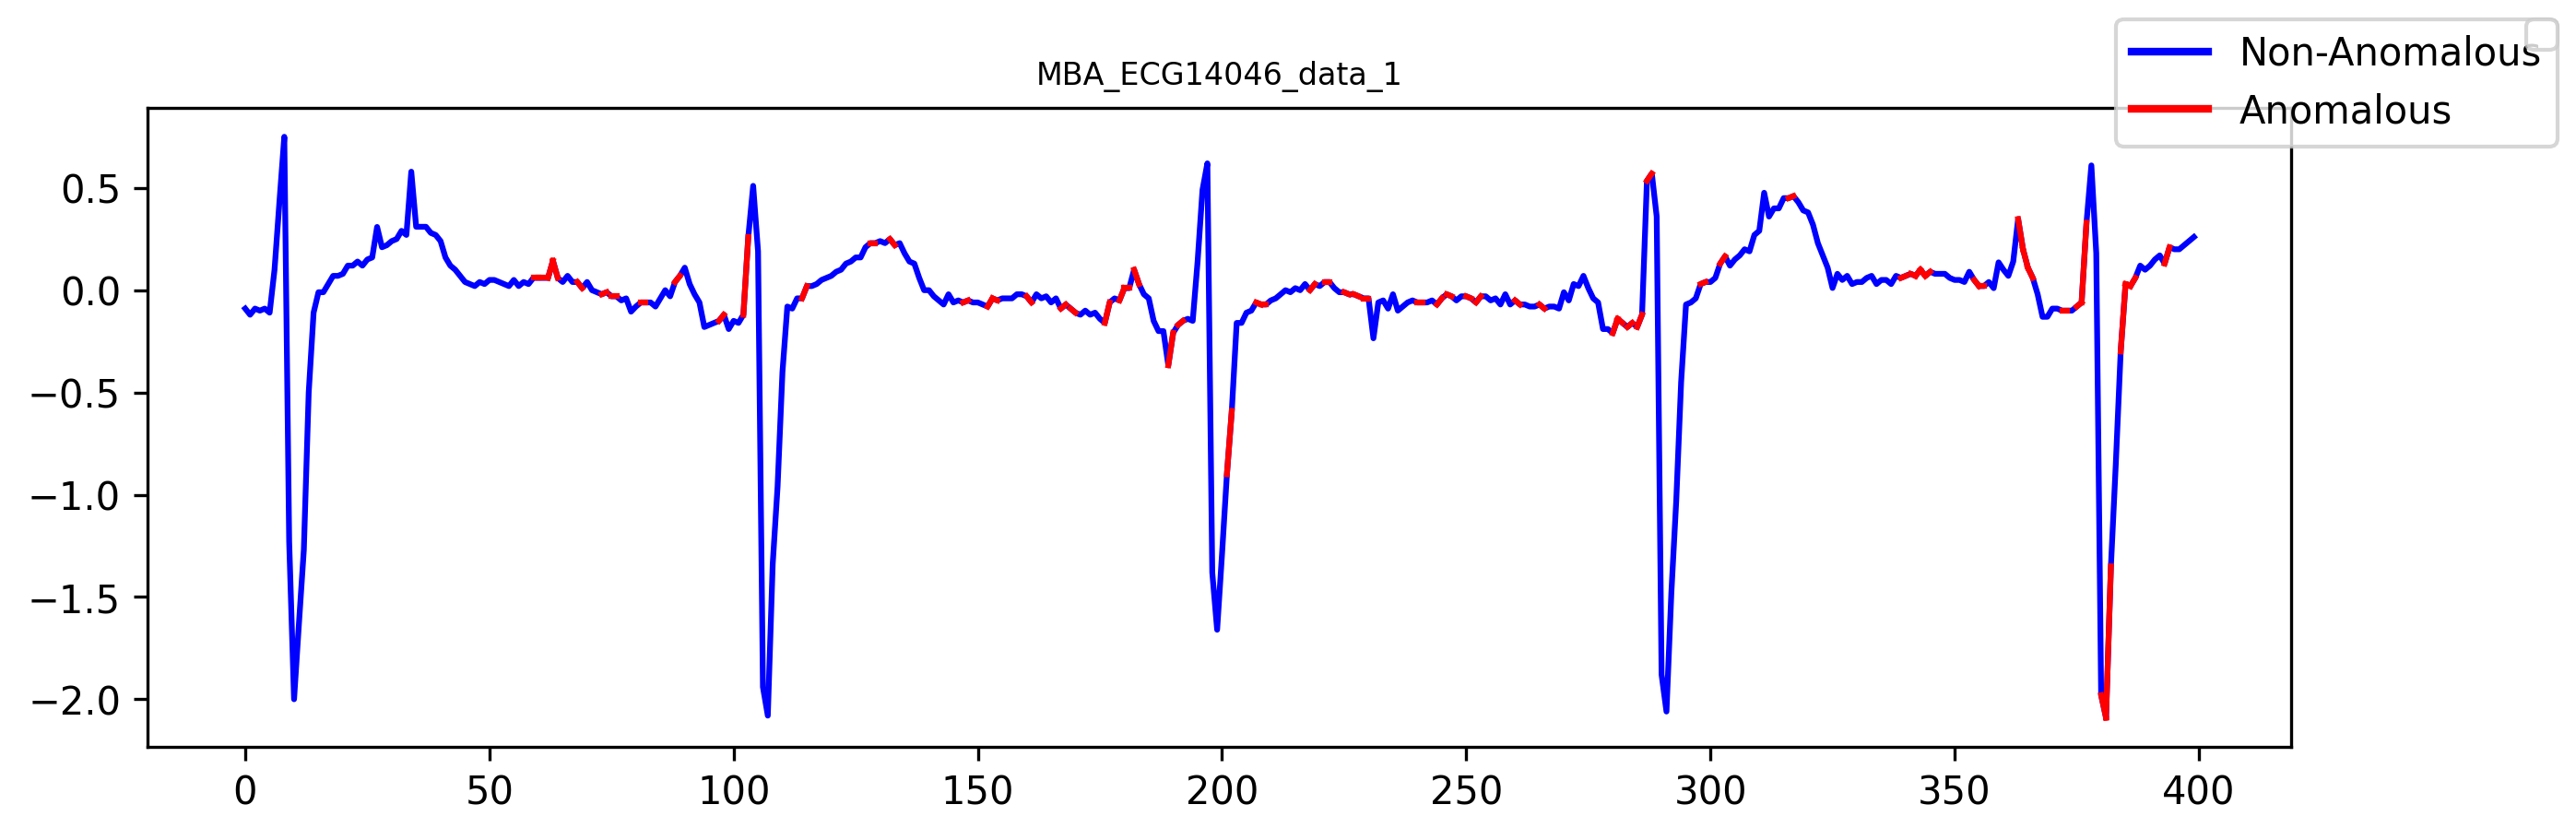

In [9]:
ECGtest.plot(start=1100, end=1500)